In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Thư viện**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# **Load Data**

In [ ]:
final_dataset_path = '/content/drive/MyDrive/Clickbait_NCKH/final_dataset.csv'
final_merged = pd.read_csv(final_dataset_path)

In [ ]:
final_merged.shape[0]

38517

In [ ]:
train_df, temp_df = train_test_split(
    final_merged,
    test_size=0.2,
    random_state=42,
    stratify=final_merged['truthClass']
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['truthClass']
)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

train_df.to_csv('/content/train.csv', index=False)
val_df.to_csv('/content/val.csv', index=False)
test_df.to_csv('/content/test.csv', index=False)

print("Datasets saved as train.csv, val.csv, and test.csv")

Train size: 30813, Validation size: 3852, Test size: 3852
Datasets saved as train.csv, val.csv, and test.csv


In [ ]:
# Chuẩn hóa cột postText (without [])
final_merged['postText'] = final_merged['postText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

clickbait_df = final_merged[final_merged['truthClass'] == 'clickbait']
non_clickbait_df = final_merged[final_merged['truthClass'] == 'no-clickbait']

print(f"Số lượng mẫu clickbait: {len(clickbait_df)}")
print(f"Số lượng mẫu non-clickbait: {len(non_clickbait_df)}")
print()

Số lượng mẫu clickbait: 9276
Số lượng mẫu non-clickbait: 29241



In [ ]:
sample_clickbait = clickbait_df.sample(n=5, random_state=42)
sample_non_clickbait = non_clickbait_df.sample(n=5, random_state=42)

print("5 Mẫu Clickbait:")
print(sample_clickbait[['id', 'postText']])

print("\n5 Mẫu Non-Clickbait:")
print(sample_non_clickbait[['id', 'postText']])

5 Mẫu Clickbait:
                       id                                           postText
5325   819514269360193536  ['#ICYMI: Why honour killings continue in Paki...
38231  811685138006503425              ['The Syrian catastrophe, explained']
23032  816355247010385921       ['All the best deals on the internet today']
26230  838897364203008001  ["What's different about @realDonaldTrump's tr...
4150   851375234976448515  ['Watch this Filipino boy turn into the spitti...

5 Mẫu Non-Clickbait:
                       id                                           postText
17992  846687097901735936  ['Cyclone Debbie slams into Australia, knockin...
1283   822704032376561664  ["Here's a (much) closer look at President Don...
31555  832790495021588484  ['SpaceX is readying a Falcon 9 rocket for a h...
1896   806176320698875904  ["London's newest chicken takeaway is 100% veg...
21119  815959828464107520  ['Tunisian charged over Poland stabbing that s...


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_proportions = train_df['truthClass'].value_counts(normalize=True) * 100
val_proportions = val_df['truthClass'].value_counts(normalize=True) * 100
test_proportions = test_df['truthClass'].value_counts(normalize=True) * 100


proportions_summary = pd.DataFrame({
    'Train': train_proportions,
    'Validation': val_proportions,
    'Test': test_proportions
}).fillna(0)  # Fill missing values with 0

print("Proportions Summary (in %):")
print(proportions_summary)



Proportions Summary (in %):
                  Train  Validation       Test
truthClass                                    
no-clickbait  75.916009   75.934579  75.908619
clickbait     24.083991   24.065421  24.091381


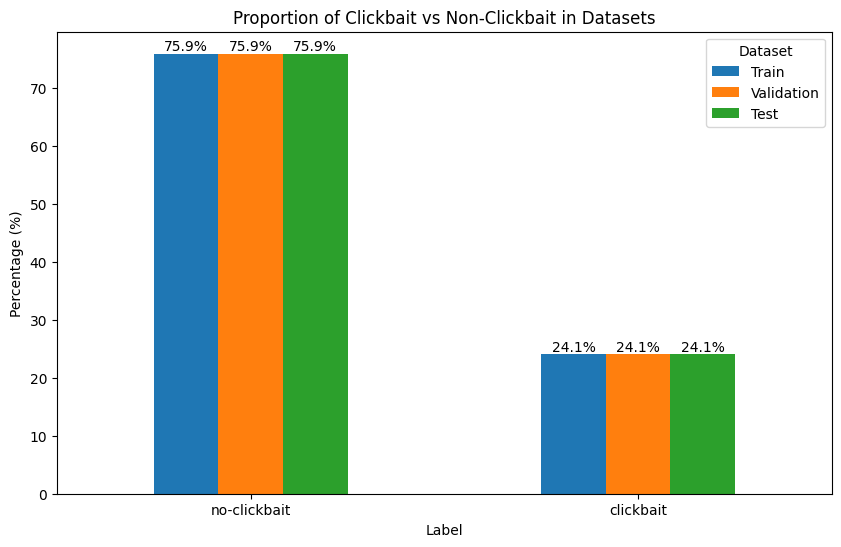

In [ ]:
ax = proportions_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Clickbait vs Non-Clickbait in Datasets')
plt.ylabel('Percentage (%)')
plt.xlabel('Label')
plt.xticks(rotation=0)
plt.legend(title='Dataset')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

In [ ]:
import os
import ast

path = '/content/'
name = 'Webis17HeadlineClsData'

df_train = pd.read_csv(path + 'train.csv')
df_validation = pd.read_csv(path + 'val.csv')
df_test = pd.read_csv(path + 'test.csv')

drop_cols = ['postMedia', 'id', 'targetCaptions', 'targetParagraphs', 'targetTitle',
             'postTimestamp', 'targetKeywords', 'targetDescription', 'truthJudgments',
             'truthMean', 'truthMedian', 'truthMode']

df_train = df_train.drop(drop_cols, axis=1)
df_validation = df_validation.drop(drop_cols, axis=1)
df_test = df_test.drop(drop_cols, axis=1)

for df in [df_train, df_validation, df_test]:
    df['postText'] = df['postText'].apply(lambda x: ' '.join(ast.literal_eval(x)).replace('\\', ''))

print(df_train.isnull().sum(), df_validation.isnull().sum(), df_test.isnull().sum())

os.makedirs('./' + name, exist_ok=True)
df_train.to_csv('./' + name + '/train.csv', index=False)
df_validation.to_csv('./' + name + '/validation.csv', index=False)
df_test.to_csv('./' + name + '/test.csv', index=False)

print(f'Datasets saved to ./{name}/ directory')


postText      0
truthClass    0
dtype: int64 postText      0
truthClass    0
dtype: int64 postText      0
truthClass    0
dtype: int64
Datasets saved to ./Webis17HeadlineClsData/ directory


In [ ]:
clickbait_= df_train[df_train['truthClass'] == 'clickbait'].head(2)
non_clickbait_= df_train[df_train['truthClass'] == 'no-clickbait'].head(5)

print("Clickbait:")
for index, row in clickbait_.iterrows():
    print(f"Sample {index + 1}: {row['postText']}")

print("\nNon-Clickbait:")
for index, row in non_clickbait_.iterrows():
    print(f"Sample {index + 1}: {row['postText']}")


Clickbait:
Sample 1: NASA study reveals how much radiation REALLY hits you when you travel by plane
Sample 5: Team MMA is a thing and it’s….

...interesting 🤔

🎥:

Non-Clickbait:
Sample 2: Marine Le Pen continues to lead in French election polls, showing she will win first round presidential vote
Sample 3: You getting mad, she getting rich. 

@KylieJenner made an ABSURD amount of money in 2016
Sample 4: Shrimp that produces sound louder than a rock concert named after Pink Floyd
Sample 6: Stunning photos show how climate change affects our own backyards
Sample 7: Lawyer calls to investigate Arkansas execution after inmate convulsed before dying


In [ ]:
df_validation.head()

,postText,truthClass
0,A tough crowd at work is no joke – stand-up co...,clickbait
1,"Russia starts to cut back forces in Syria, Rus...",no-clickbait
2,26 pictures that will ruin your weekend,clickbait
3,EXCLUSIVE: Court rulings raise number of legal...,no-clickbait
4,News Alert: Activists set fires at pipeline pr...,no-clickbait


In [ ]:
df_train.head()

,postText,truthClass
0,NASA study reveals how much radiation REALLY h...,clickbait
1,Marine Le Pen continues to lead in French elec...,no-clickbait
2,"You getting mad, she getting rich. \n\n@KylieJ...",no-clickbait
3,Shrimp that produces sound louder than a rock ...,no-clickbait
4,Team MMA is a thing and it’s….\n\n...interesti...,clickbait


In [ ]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Preprocessing**

In [ ]:
# Tiền xử lý văn bản
stopwords = set(stopwords.words('english'))

def clean_data(text):
    if type(text) == float:  # Loại bỏ giá trị NaN
        return ""
    temp = text.lower()
    temp = re.sub("'", "", temp)  # Giữ lại từ viết tắt
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)


In [ ]:
train_data = pd.read_csv('/content/Webis17HeadlineClsData/train.csv')
val_data = pd.read_csv('/content/Webis17HeadlineClsData/validation.csv')
test_data = pd.read_csv('/content/Webis17HeadlineClsData/test.csv')

In [ ]:
# Drop missing values
train_data = train_data.dropna()
val_data = val_data.dropna()
test_data = test_data.dropna()

# Separate features and labels
train_x = train_data['postText'].tolist()
train_y = train_data['truthClass'].tolist()
val_x = val_data['postText'].tolist()
val_y = val_data['truthClass'].tolist()
test_x = test_data['postText'].tolist()
test_y = test_data['truthClass'].tolist()

# Clean data
train_x = list(map(clean_data, list(map(deEmojify, train_x))))
val_x = list(map(clean_data, list(map(deEmojify, val_x))))
test_x = list(map(clean_data, list(map(deEmojify, test_x))))

# Convert labels
label_map = {'clickbait': 1, 'no-clickbait': 0}
train_y = [label_map[label] for label in train_y]
val_y = [label_map[label] for label in val_y]
test_y = [label_map[label] for label in test_y]

# TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(train_x)
val_vectors = vectorizer.transform(val_x)
test_vectors = vectorizer.transform(test_x)


In [ ]:
print(f"Kích thước X_train: {len(train_x)}")
print(f"Kích thước X_val: {len(val_x)}")
print(f"Kích thước X_test: {len(test_x)}")


Kích thước X_train: 30718
Kích thước X_val: 3837
Kích thước X_test: 3842


In [ ]:
print(f"Kích thước dữ liệu gốc: {final_merged.shape}")


Kích thước dữ liệu gốc: (38517, 15)


# **SVM**

In [ ]:
print("Training SVM...")
classifier_svm = svm.SVC(kernel='rbf', C=1)
classifier_svm.fit(train_vectors, train_y)

pred_test_svm = classifier_svm.predict(test_vectors)
pred_val_svm = classifier_svm.predict(val_vectors)

print("\nSVM Results on Test Data:")
print(classification_report(test_y, pred_test_svm, digits=4))

Training SVM...

SVM Results on Test Data:
              precision    recall  f1-score   support

           0     0.8216    0.9586    0.8848      2921
           1     0.7212    0.3398    0.4620       921

    accuracy                         0.8103      3842
   macro avg     0.7714    0.6492    0.6734      3842
weighted avg     0.7975    0.8103    0.7835      3842



In [ ]:
import seaborn as sns

In [ ]:

# cm_test = confusion_matrix(test_y, pred_test_svm)
# cm_val = confusion_matrix(val_y, pred_val_svm)


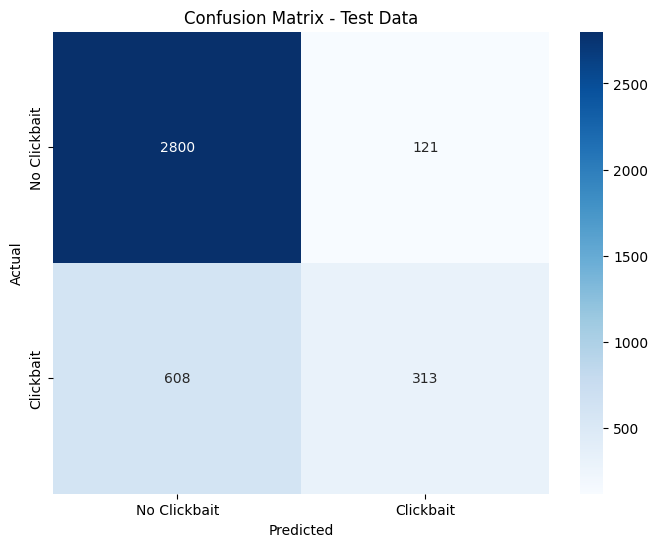

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Clickbait', 'Clickbait'], yticklabels=['No Clickbait', 'Clickbait'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

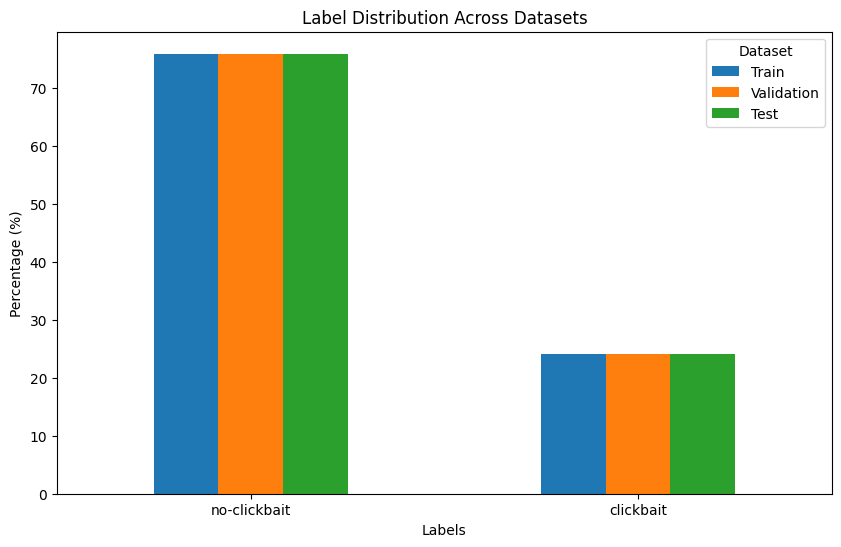

In [ ]:
# Phân bố nhãn trong tập dữ liệu
train_counts = train_df['truthClass'].value_counts()
val_counts = val_df['truthClass'].value_counts()
test_counts = test_df['truthClass'].value_counts()

# Vẽ biểu đồ tỷ lệ phân bố nhãn
proportions_df = pd.DataFrame({
    'Train': train_counts / len(train_df) * 100,
    'Validation': val_counts / len(val_df) * 100,
    'Test': test_counts / len(test_df) * 100
})

proportions_df.plot(kind='bar', figsize=(10, 6))
plt.title('Label Distribution Across Datasets')
plt.ylabel('Percentage (%)')
plt.xlabel('Labels')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.show()


# **LSTM**

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

**LSTM and BilSTM**

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_x)

train_sequences = tokenizer.texts_to_sequences(train_x)
val_sequences = tokenizer.texts_to_sequences(val_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

max_length = 50
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')



In [ ]:
print(f"Kích thước X_train: {train_padded.shape}")
print(f"Kích thước X_val: {val_padded.shape}")
print(f"Kích thước X_test: {test_padded.shape}")

Kích thước X_train: (30718, 50)
Kích thước X_val: (3837, 50)
Kích thước X_test: (3842, 50)


In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(128, return_sequences=False),
    Dropout(0.6),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

train_y = np.array(train_y)
val_y = np.array(val_y)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    train_padded, train_y,
    validation_data=(val_padded, val_y),
    epochs=150,
    batch_size=34,
    callbacks=[early_stopping]
)


Epoch 1/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7482 - loss: 0.5857 - val_accuracy: 0.7618 - val_loss: 0.5498
Epoch 2/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7633 - loss: 0.5623 - val_accuracy: 0.7618 - val_loss: 0.5503
Epoch 3/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7597 - loss: 0.5623 - val_accuracy: 0.7618 - val_loss: 0.5499
Epoch 4/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7585 - loss: 0.5637 - val_accuracy: 0.7618 - val_loss: 0.5490
Epoch 5/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7580 - loss: 0.5607 - val_accuracy: 0.7618 - val_loss: 0.5490
Epoch 6/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7596 - loss: 0.5590 - val_accuracy: 0.7618 - val_loss: 0.5495
Epoch 7/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7608 - loss: 0.5530 - val_accuracy: 0.8087 - val_loss: 0.4211
Epoch 8/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8256 - loss: 0.4073 - va

# **Results LSTM**

In [ ]:

test_loss, test_acc = model.evaluate(test_padded, np.array(test_y))
print(f"\nTest Accuracy: {test_acc:.4f}")

# Dự đoán trên tập test
test_preds = (model.predict(test_padded) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(test_y, test_preds, target_names=["No Clickbait", "Clickbait"], digits=4))


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8133 - loss: 0.4061

Test Accuracy: 0.8183
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
              precision    recall  f1-score   support

No Clickbait     0.8577    0.9124    0.8842      2921
   Clickbait     0.6517    0.5201    0.5785       921

    accuracy                         0.8183      3842
   macro avg     0.7547    0.7162    0.7314      3842
weighted avg     0.8083    0.8183    0.8109      3842



# **BiLSTM**

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.6),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, 50))

model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,559,681 (5.95 MB)

 Trainable params: 1,559,681 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

train_padded = np.array(train_padded, dtype=np.int32)
val_padded = np.array(val_padded, dtype=np.int32)
test_padded = np.array(test_padded, dtype=np.int32)

train_y = np.array(train_y, dtype=np.int32)
val_y = np.array(val_y, dtype=np.int32)
test_y = np.array(test_y, dtype=np.int32)


In [ ]:
print(f"Kích thước train_padded: {train_padded.shape}")
print(f"Kích thước train_y: {train_y.shape}")


Kích thước train_padded: (30718, 50)
Kích thước train_y: (30718,)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    train_padded, train_y,
    validation_data=(val_padded, val_y),
    epochs=150,
    batch_size = 34,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_padded, test_y)
print(f"\nTest Accuracy (BiLSTM): {test_acc:.2f}")


Epoch 1/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 54s 19ms/step - accuracy: 0.7024 - loss: 0.6322 - val_accuracy: 0.7618 - val_loss: 0.5474
Epoch 2/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 63s 14ms/step - accuracy: 0.7602 - loss: 0.5584 - val_accuracy: 0.7618 - val_loss: 0.5115
Epoch 3/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.7657 - loss: 0.5230 - val_accuracy: 0.7766 - val_loss: 0.4928
Epoch 4/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7705 - loss: 0.5073 - val_accuracy: 0.7808 - val_loss: 0.4851
Epoch 5/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.7741 - loss: 0.5009 - val_accuracy: 0.7780 - val_loss: 0.4784
Epoch 6/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.7774 - loss: 0.4893 - val_accuracy: 0.7777 - val_loss: 0.4719
Epoch 7/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.7846 - loss: 0.4768 - val_accuracy: 0.7806 - val_loss: 0.4640
Epoch 8/150
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 

KeyboardInterrupt: 

# **Results BiLSTM**

In [ ]:
from sklearn.metrics import classification_report
test_preds = (model.predict(test_padded) > 0.5).astype("int32")
print(classification_report(test_y, test_preds, target_names=["No Clickbait", "Clickbait"], digits=4))

# **XLM-RoBERT**

In [ ]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import  precision_score, recall_score, f1_score

In [ ]:
final_merged.shape[0]

38517

In [ ]:
print(final_merged['postText'].head())
print(type(final_merged['postText'][0]))

0    ['UK’s response to modern slavery leaving vict...
1                                     ['this is good']
2    ['The "forgotten" Trump roast: Relive his brut...
3             ['Meet the happiest #dog in the world!']
4    ["Tokyo's subway is shut down amid fears over ...
Name: postText, dtype: object
<class 'str'>


In [ ]:
def tukey_outliers(data, column):
    """Loại bỏ outliers sử dụng Tukey Method."""
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Tính độ dài câu
final_merged['postText_len'] = final_merged['postText'].apply(lambda x: len(x.split()))

# 1. Full Dataset
full_data = final_merged.copy()

# 2. No Outliers
no_outliers_data = tukey_outliers(final_merged, 'postText_len')

datasets = {
    "Full Dataset": full_data,
    "Without Outliers": no_outliers_data
}


In [ ]:
# XLM-RoBERTa trên 2 phiên bản
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

def tokenize_data(texts, labels):
    inputs = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=50, return_tensors='pt')
    return {'input_ids': inputs['input_ids'], 'attention_mask': inputs['attention_mask'], 'labels': torch.tensor(labels.tolist())}

class ClickbaitDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __len__(self):
        return len(self.encodings['input_ids'])
    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

def train_and_evaluate(dataset, name):

    train_df, temp_df = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['truthClass'])
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['truthClass'])


    label_map = {'clickbait': 1, 'no-clickbait': 0}
    train_y = train_df['truthClass'].map(label_map)
    val_y = val_df['truthClass'].map(label_map)
    test_y = test_df['truthClass'].map(label_map)


    train_encodings = tokenize_data(train_df['postText'], train_y)
    val_encodings = tokenize_data(val_df['postText'], val_y)
    test_encodings = tokenize_data(test_df['postText'], test_y)

    train_dataset = ClickbaitDataset(train_encodings)
    val_dataset = ClickbaitDataset(val_encodings)
    test_dataset = ClickbaitDataset(test_encodings)


    model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=2)

    training_args = TrainingArguments(
    output_dir=f"./results_{name}",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir='./logs',
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )

    # Training and Review
    print(f"\nTraining XLM-RoBERTa on {name}...")
    trainer.train()

    predictions = trainer.predict(test_dataset)
    preds = predictions.predictions.argmax(-1)

    print(f"Classification Report ({name}):")
    print(classification_report(test_y, preds, digits=4))

    return precision_score(test_y, preds), recall_score(test_y, preds), f1_score(test_y, preds)



In [ ]:
#Results
results = []
for name, dataset in datasets.items():
    precision, recall, f1 = train_and_evaluate(dataset, name)
    results.append({"Dataset": name, "Precision": precision, "Recall": recall, "F1-Score": f1})

results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.



Training XLM-RoBERTa on Full Dataset...


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.345700,0.334095
2,0.294500,0.311892
3,0.244800,0.326508


Classification Report (Full Dataset):
              precision    recall  f1-score   support

           0     0.8934    0.9289    0.9108      2924
           1     0.7438    0.6509    0.6943       928

    accuracy                         0.8619      3852
   macro avg     0.8186    0.7899    0.8025      3852
weighted avg     0.8574    0.8619    0.8586      3852



Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(



Training XLM-RoBERTa on Without Outliers...


Epoch,Training Loss,Validation Loss
1,0.348400,0.330157
2,0.278700,0.310164
3,0.233500,0.361175


Classification Report (Without Outliers):
              precision    recall  f1-score   support

           0     0.9182    0.9216    0.9199      2909
           1     0.7397    0.7306    0.7351       887

    accuracy                         0.8770      3796
   macro avg     0.8289    0.8261    0.8275      3796
weighted avg     0.8765    0.8770    0.8767      3796


Summary of Results:
            Dataset  Precision    Recall  F1-Score
0      Full Dataset   0.743842  0.650862  0.694253
1  Without Outliers   0.739726  0.730552  0.735111


In [ ]:
results_df.set_index("Dataset").plot(kind="bar", figsize=(10, 6))
plt.title("XLM-RoBERTa Performance on Different Datasets")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()